In [41]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('Combined_QB.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [43]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_accuracy_percent', 'weighted_avg_aimed_passes',
       'weighted_avg_attempts', 'weighted_avg_avg_depth_of_target',
       'weighted_avg_avg_time_to_throw', 'weighted_avg_bats',
       'weighted_avg_big_time_throws', 'weighted_avg_btt_rate',
       'weighted_avg_completion_percent', 'weighted_avg_completions',
       'weighted_avg_declined_penalties', 'weighted_avg_def_gen_pressures',
       'weighted_avg_drop_rate', 'weighted_avg_dropbacks',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass', 'weighted_avg_grades_run',
       'weighted_avg_hit_as_threw', 'weighted_avg_interceptions',
       'weighted_avg_passing_snaps', 'weighted_avg_penalties',
       'w

In [44]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)


In [45]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       QB        11.439957         24.060673         11.0   
50   49ers  2020       QB         0.610494         34.317120         15.0   
70   49ers  2021       QB        17.863014        528.923536         11.0   
123  49ers  2022       QB         6.959654        412.212335         15.0   
12   Bears  2019       QB         7.396387        434.985593         15.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         15.0     64.331406    77.900000     27.90%  ...   
50         11.0     77.900000    61.558114      5.40%  ...   
70         15.0     61.558114    72.551515     19.50%  ...   
123        17.0     72.551515    71.909475     27.60%  ...   
12          9.0     62.198104    64.653902     -2.10%  ...   

     Previous_sack_percent  Previous_sacks  Previous_scrambles  \
17                8.019063       16.592188            4.965625   
50                6.800000      

In [46]:
team_data = df.groupby('Team')
print(team_data.head)


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x31973e000>>


In [47]:
import numpy as np

sequences = []
targets = []
teams = []

# Iterate over each team and its respective data
for team, group in team_data:
    teams.append(team)
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['weighted_avg_qb_rating', 'Current_PFF', 'weighted_avg_grades_pass', 'weighted_avg_big_time_throws', 'Value_cap_space', 'weighted_avg_sack_percent', 
                'weighted_avg_twp_rate', 'Current_AV']]
  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Net EPA']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [48]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[102.          77.9         75.7         13.          11.43995749
     6.8          3.4         15.        ]
  [ 90.24605873  61.55811437  60.39690881   7.38485317   0.61049445
     6.34945904   4.5137558   11.        ]
  [ 98.48080808  72.55151515  71.13686869   8.9040404   17.8630137
     5.69292929   4.5530303   15.        ]]

 [[ 84.07037572  64.65390173  64.42196532  18.1734104    7.39638682
     6.93106936   3.44566474   9.        ]
  [ 86.73453237  64.11294964  62.75971223  13.45323741   8.06760848
     5.36115108   4.44748201  10.        ]
  [ 76.22885714  65.11014286  61.79014286  11.71285714   6.39452055
     8.79271429   3.56214286  10.        ]]

 [[ 75.65215577  60.80876217  60.30166898  15.24617524   9.24017003
     7.04255911   4.6108484    8.        ]
  [ 85.51304985  69.71950147  68.8627566   11.97653959   0.61049445
     7.33343109   3.53695015  10.        ]
  [106.62876304  88.60789866  88.10163934  32.80923994   5.34794521
     8.71892697   2.4         15.        

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [50]:
# Define the input layer
inputs = Input(shape=(3, 8))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)


In [51]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [52]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3458e-04 
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 2.3397e-04
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4837e-04
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 3.9416e-04
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4438e-04


/opt/anaconda3/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


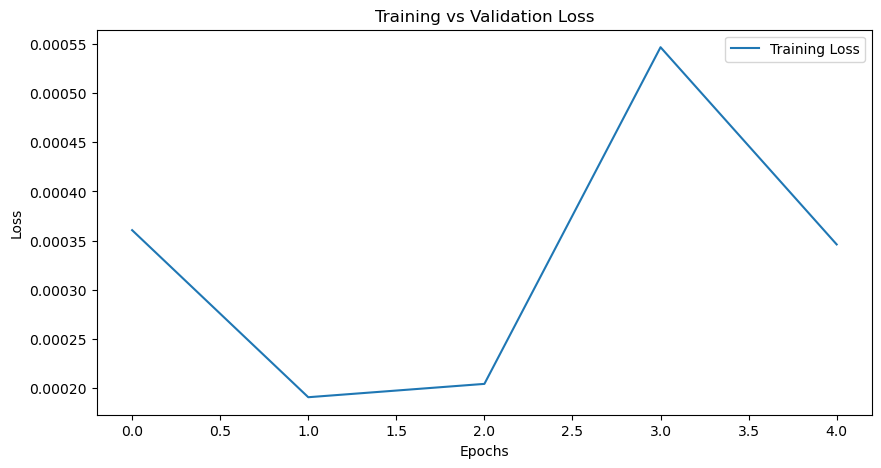

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32
R² Score: 0.9943


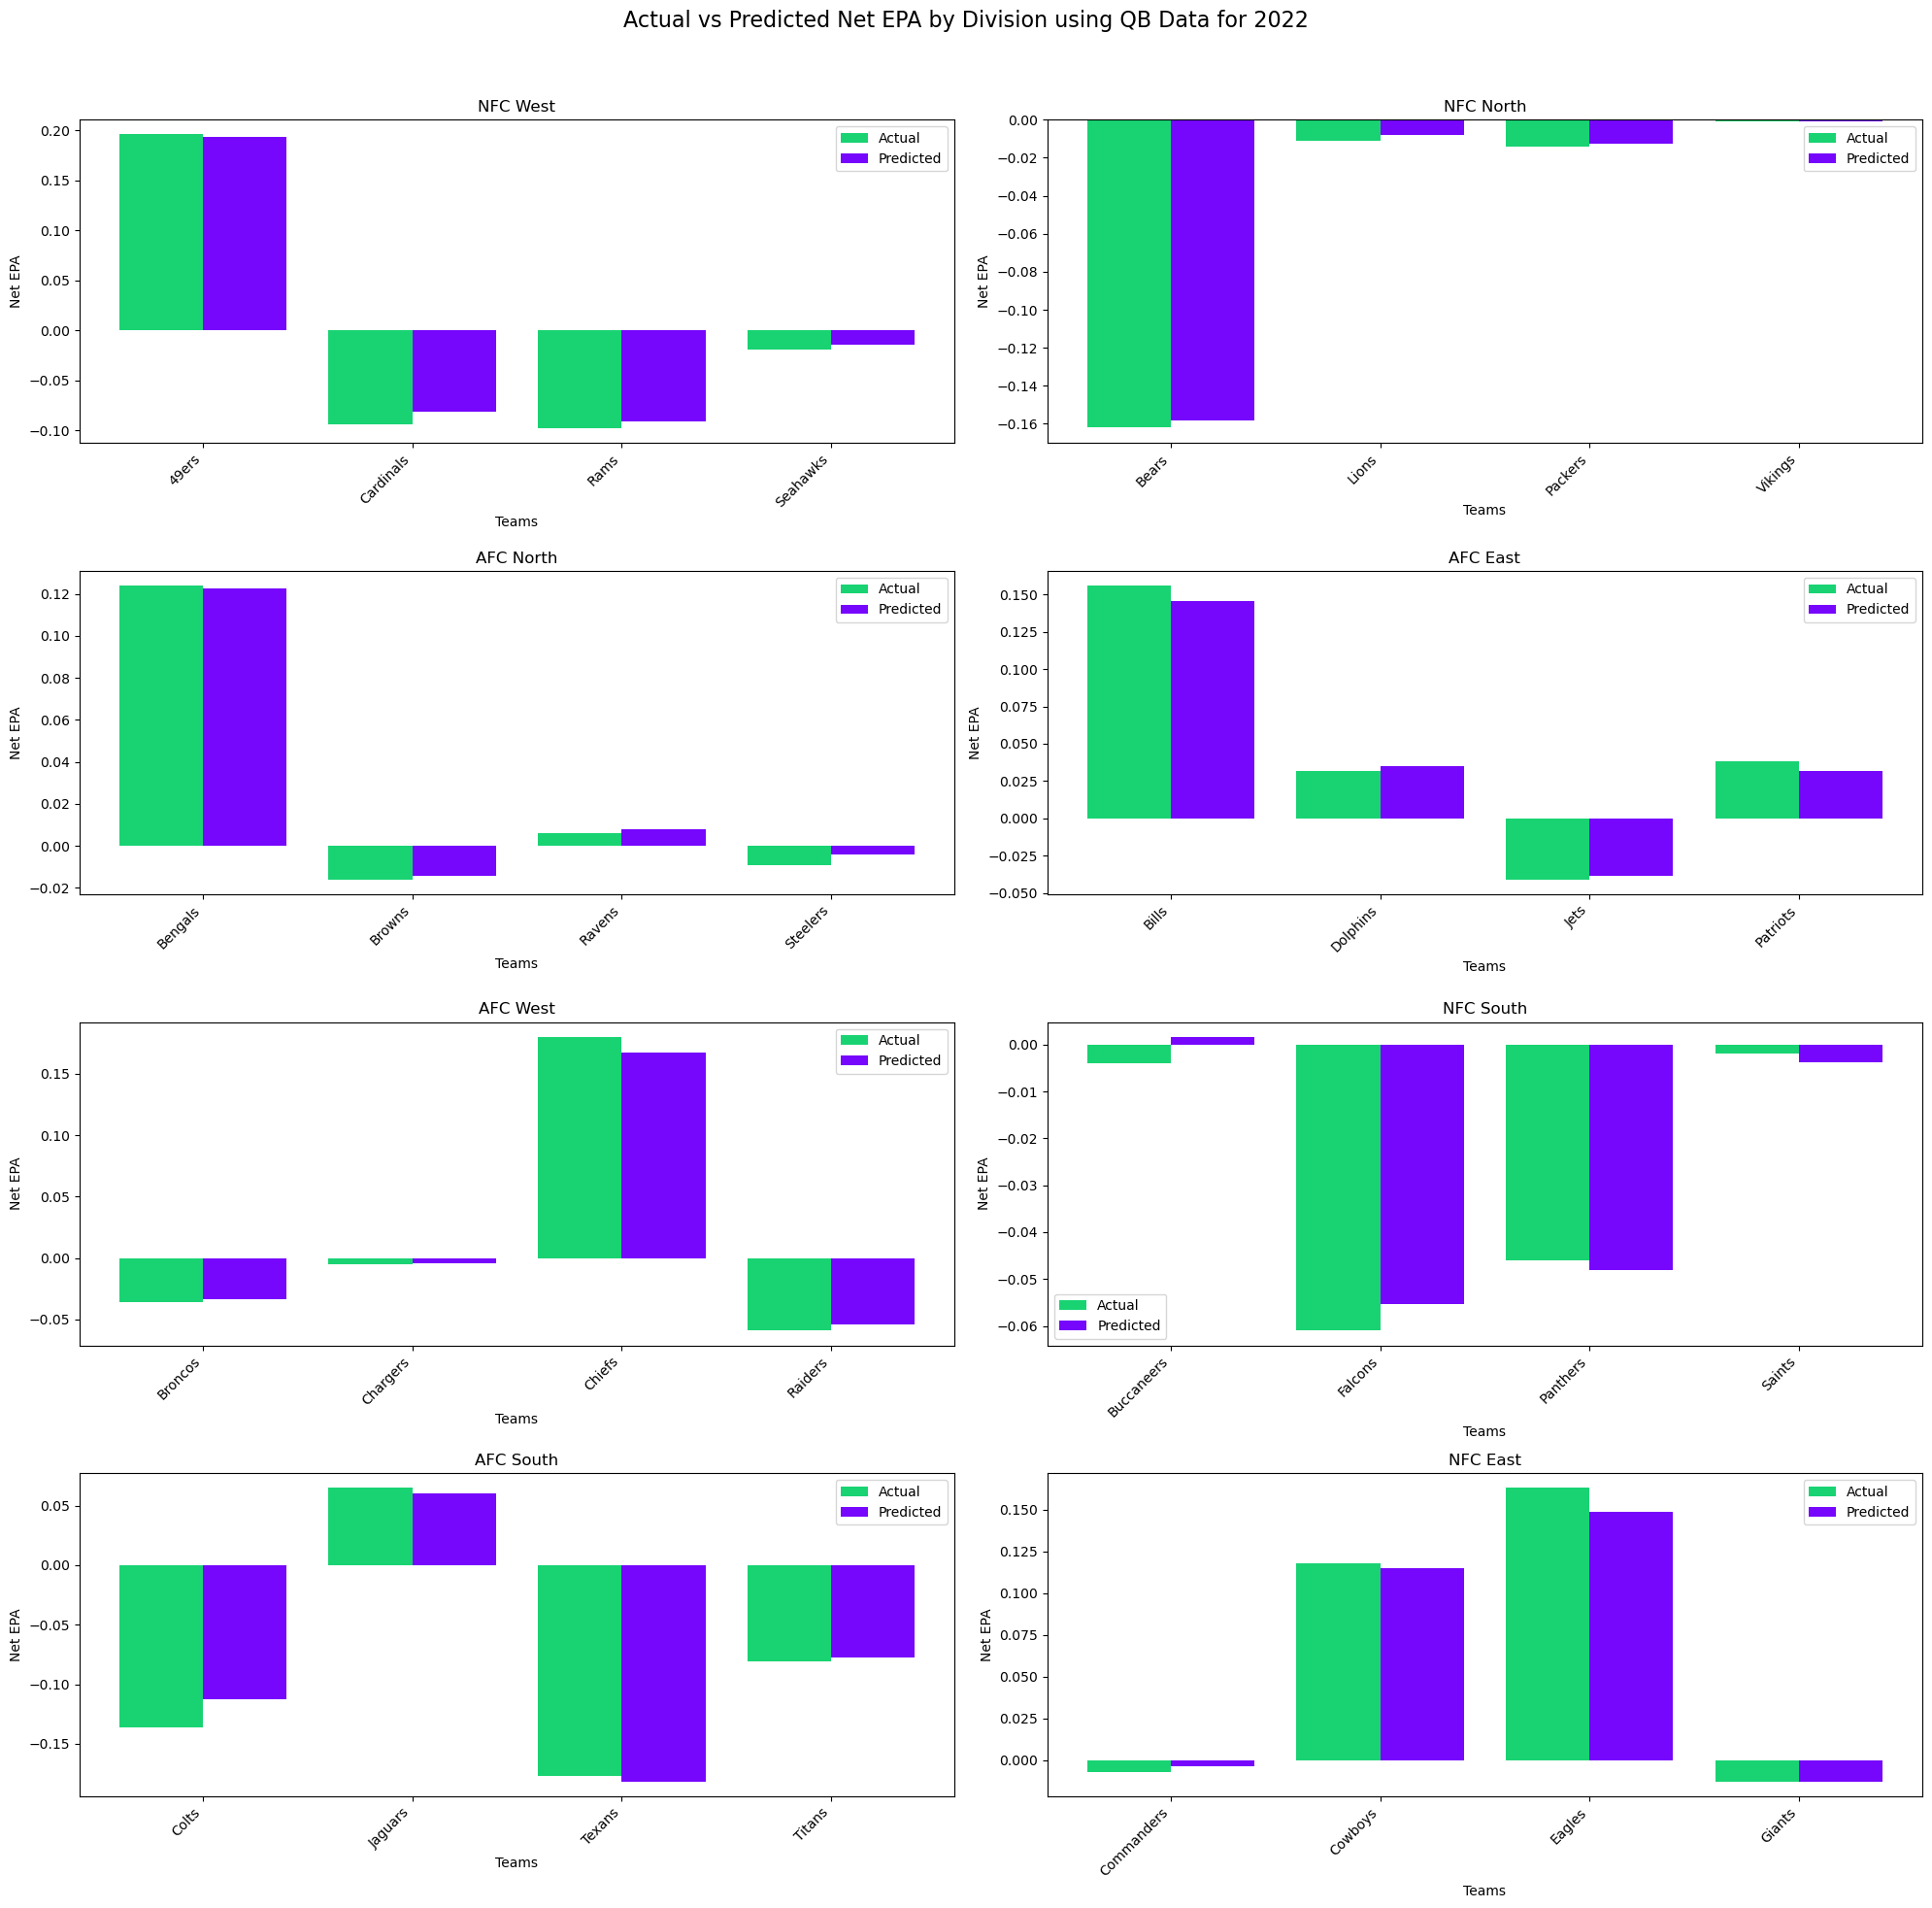

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0347e-04 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6161e-04 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 4.1923e-04
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4695e-04
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6167e-04 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 4.7812e-04
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 3.5987e-04
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3577e-04
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 3.6242e-04
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9664e-04


/opt/anaconda3/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


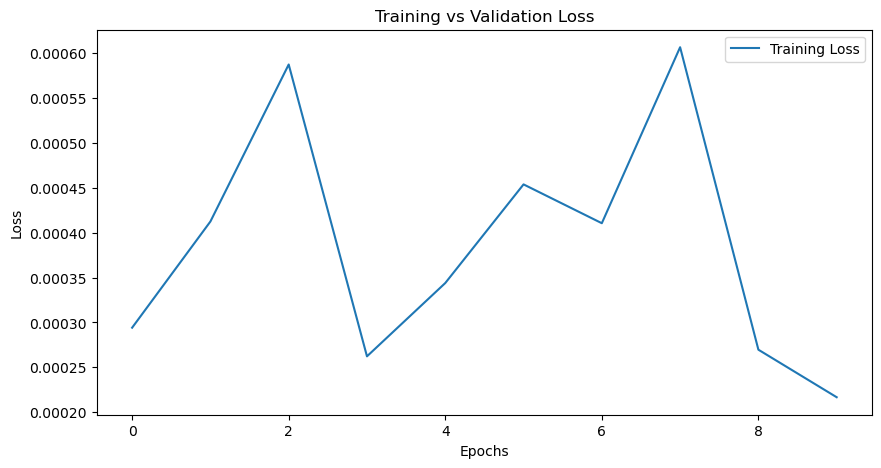

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32
R² Score: 0.9915


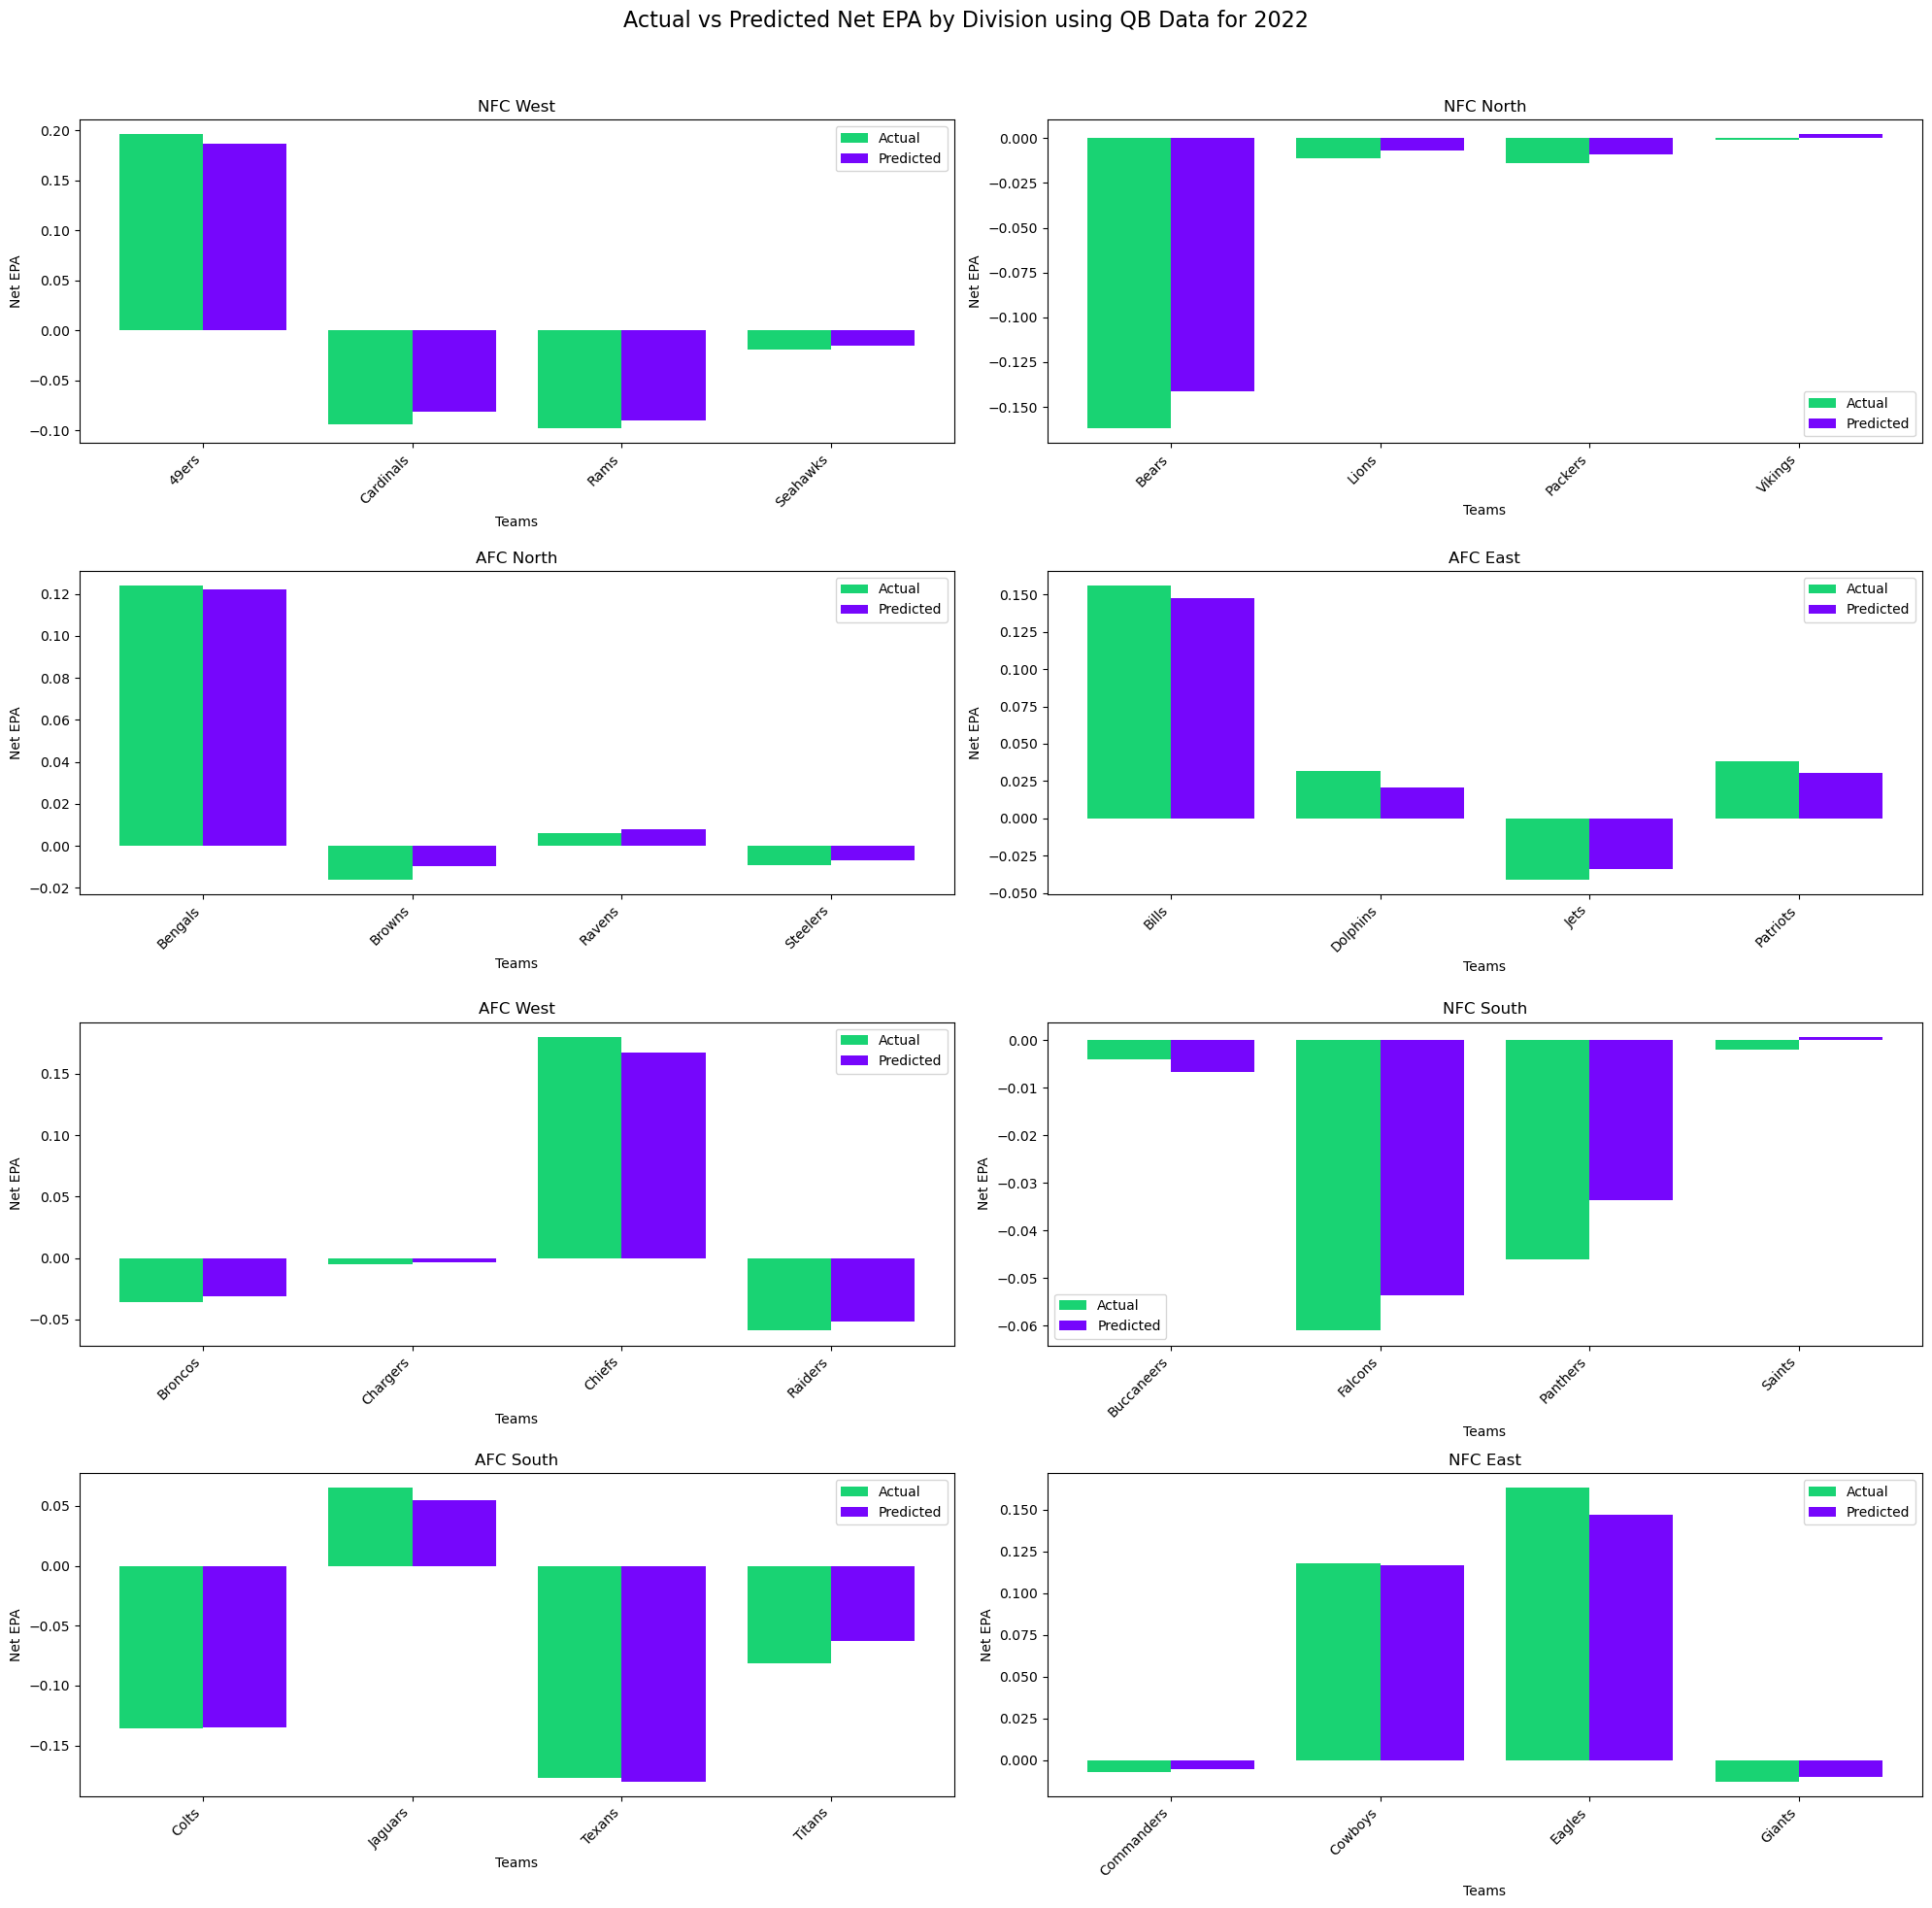

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4166e-04 
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5508e-04 
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9544e-04 
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1076e-04 
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5285e-04 
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 1.4030e-04
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3824e-04
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7742e-04 
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6153e-04
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 1.8510e-04
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 5.3347e-04
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 8.9751e-04
Epoch 13/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2779e-04
Epoch 14/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2388e-04
Epoch 15/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 970

/opt/anaconda3/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7798e-04
Epoch 18/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9123e-04
Epoch 19/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 5.6505e-04
Epoch 20/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3688e-04
Epoch 21/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 7.2164e-04
Epoch 22/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7908e-04
Epoch 23/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 1.6179e-04
Epoch 24/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 4.3401e-04
Epoch 25/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 5.1172e-04


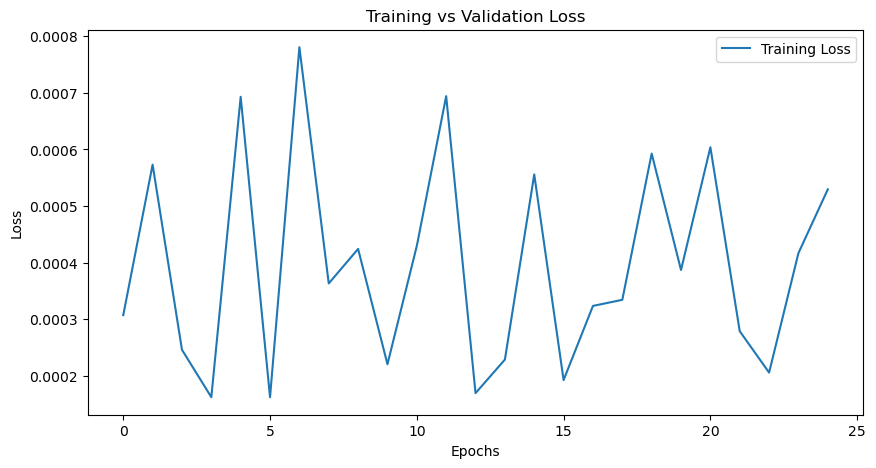

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
32
R² Score: 0.9920


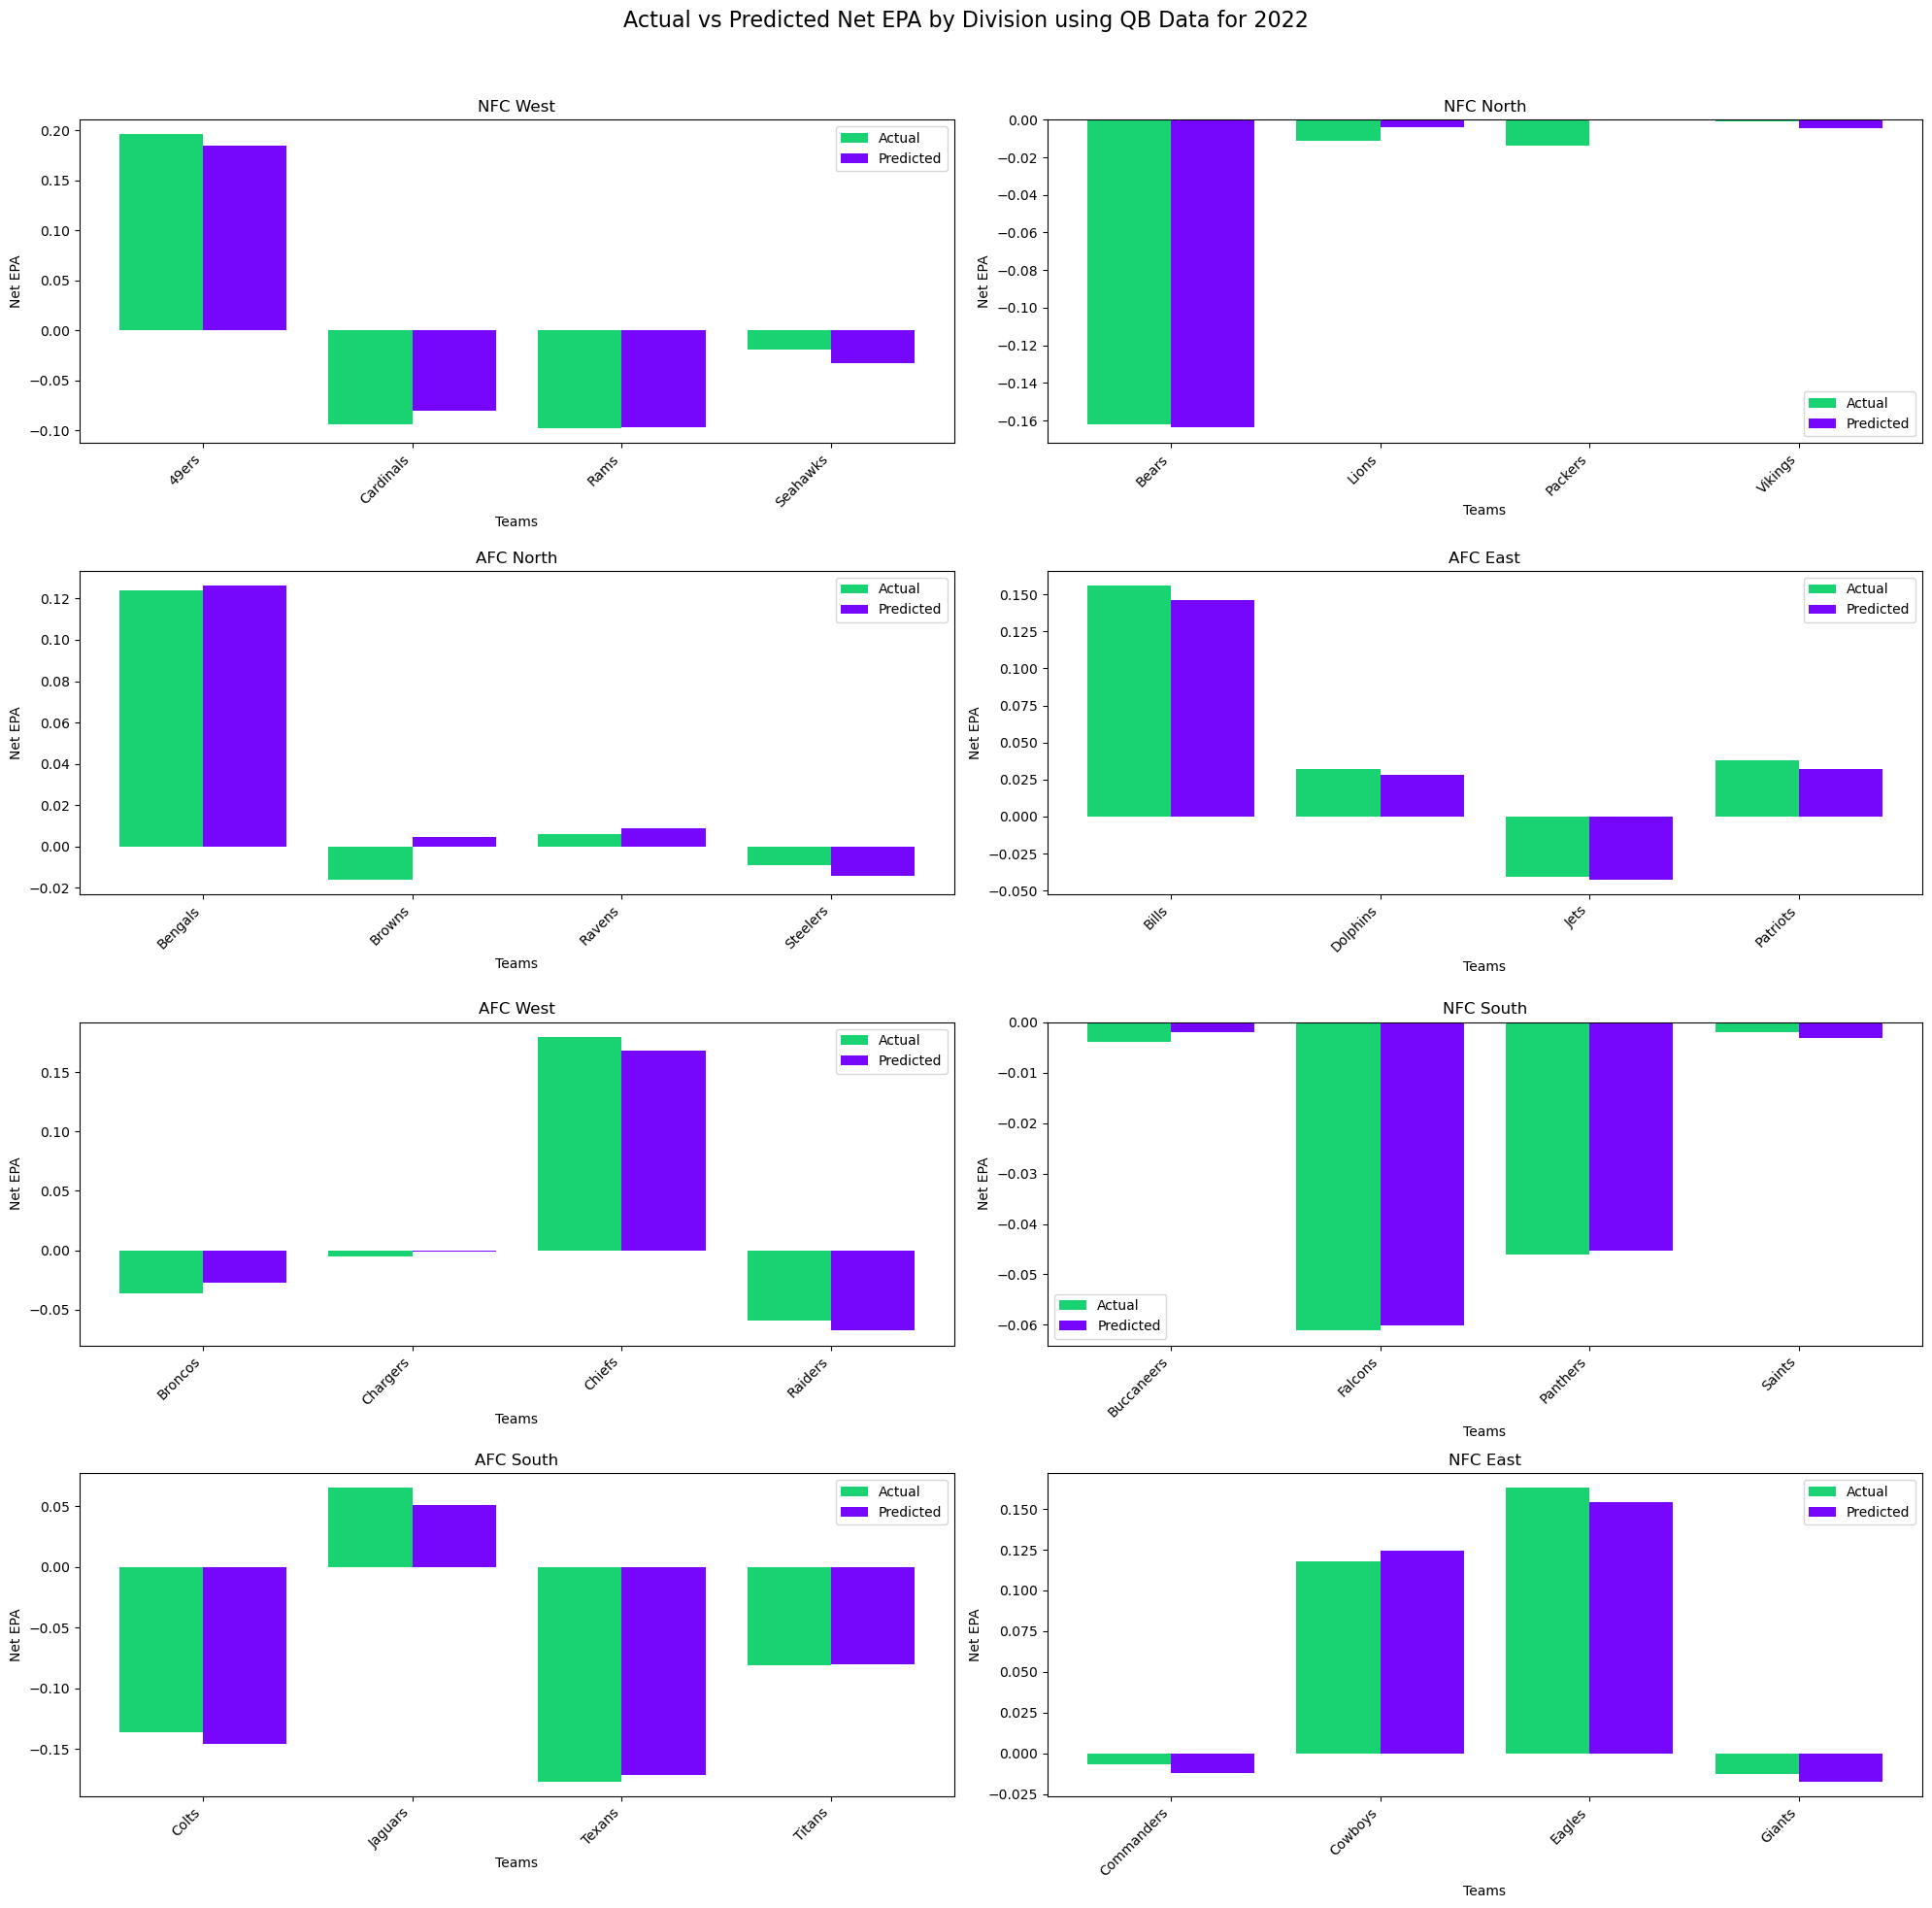

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8617e-04 
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4761e-04 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5788e-04 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3345e-04
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 9.4000e-04
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3157e-04 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6098e-04
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 6.2500e-04
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 2.8752e-04
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 5.0122e-04
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 4.6401e-04
Epoch 12/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8652e-04 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9916e-04 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2312e-04
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2083e-04 
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9417e-04 
Epoch 17/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3437e-04 
Epoch 18/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.9453e-04
Epoch 19/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8957e-04
Epoch 20/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 4.4520e-04
Epoch 21/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 4.4614e-04
Epoch 22/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 3.2661e-04
Epoch 23/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 2.0597e-04
Epoch 24/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3777e-04 
Epoch 25/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 2.4081e-04
Epoch 26/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

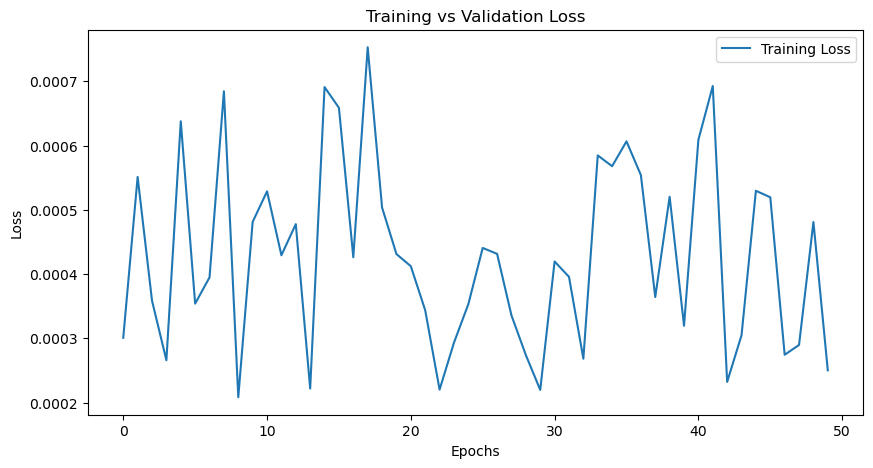

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
32
R² Score: 0.9903


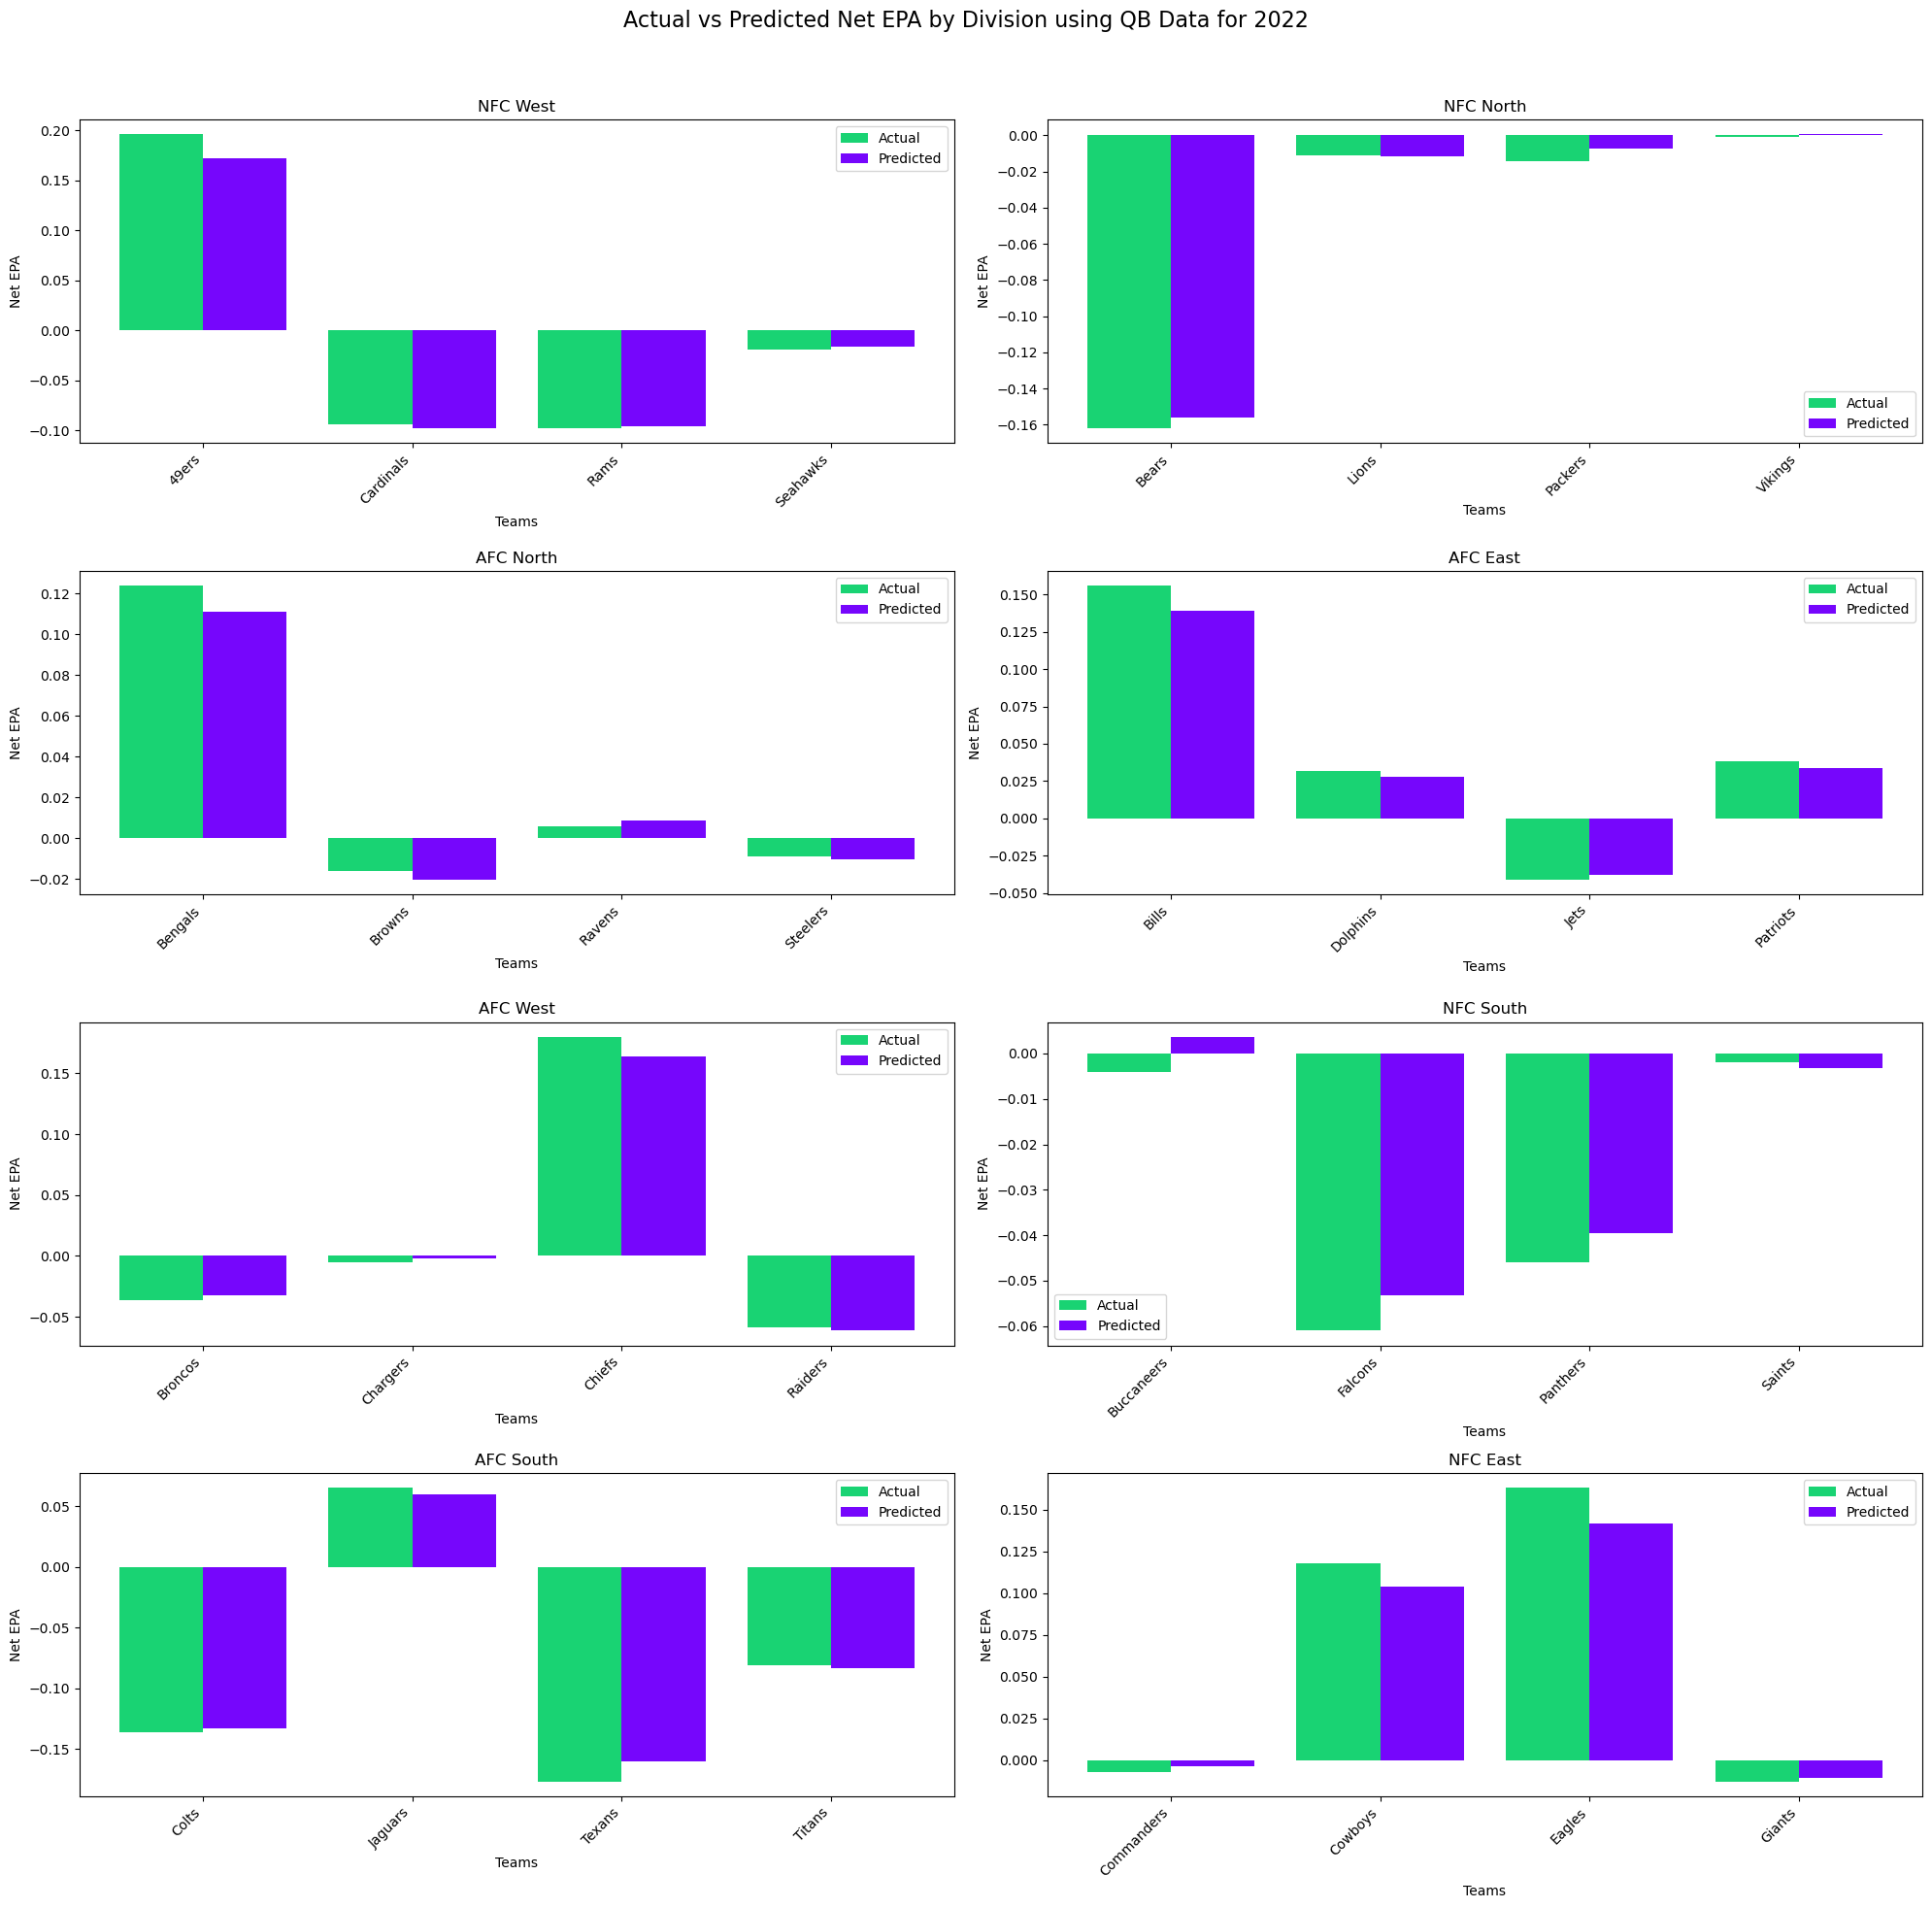

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7268e-04 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5646e-04
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2138e-04 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8219e-04
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2453e-04 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1694e-04 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3938e-04 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7685e-04 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6458e-04
Epoch 11/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 2.9840e-04
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 3.1933e-04
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 3.4585e-04
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5636e-04 
Epoch 16/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 4.9829e-04
Epoch 17/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9429e-04 
Epoch 18/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 3.5918e-04
Epoch 19/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 3.8732e-04
Epoch 20/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9094e-04 
Epoch 21/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4587e-04 
Epoch 22/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9656e-04 
Epoch 23/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 
Epoch 24/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0241e-04 
Epoch 25/100
4/4 ━━━━━━━━━━━━━━━━━━

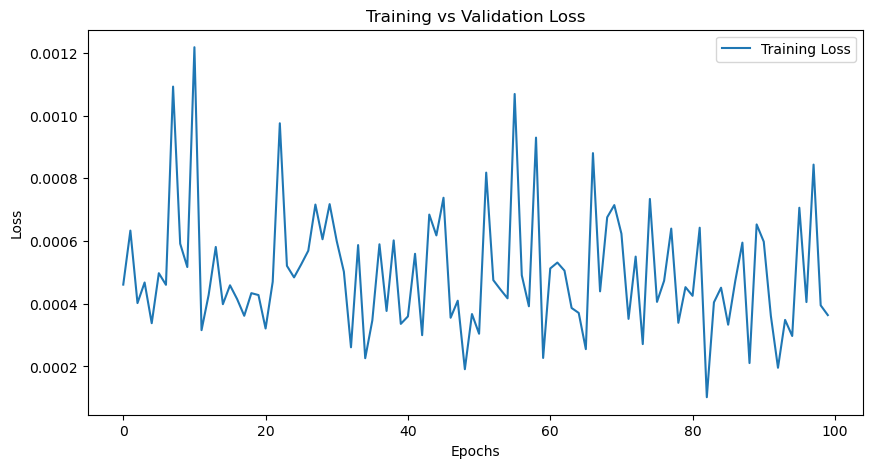

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
32
R² Score: 0.9430


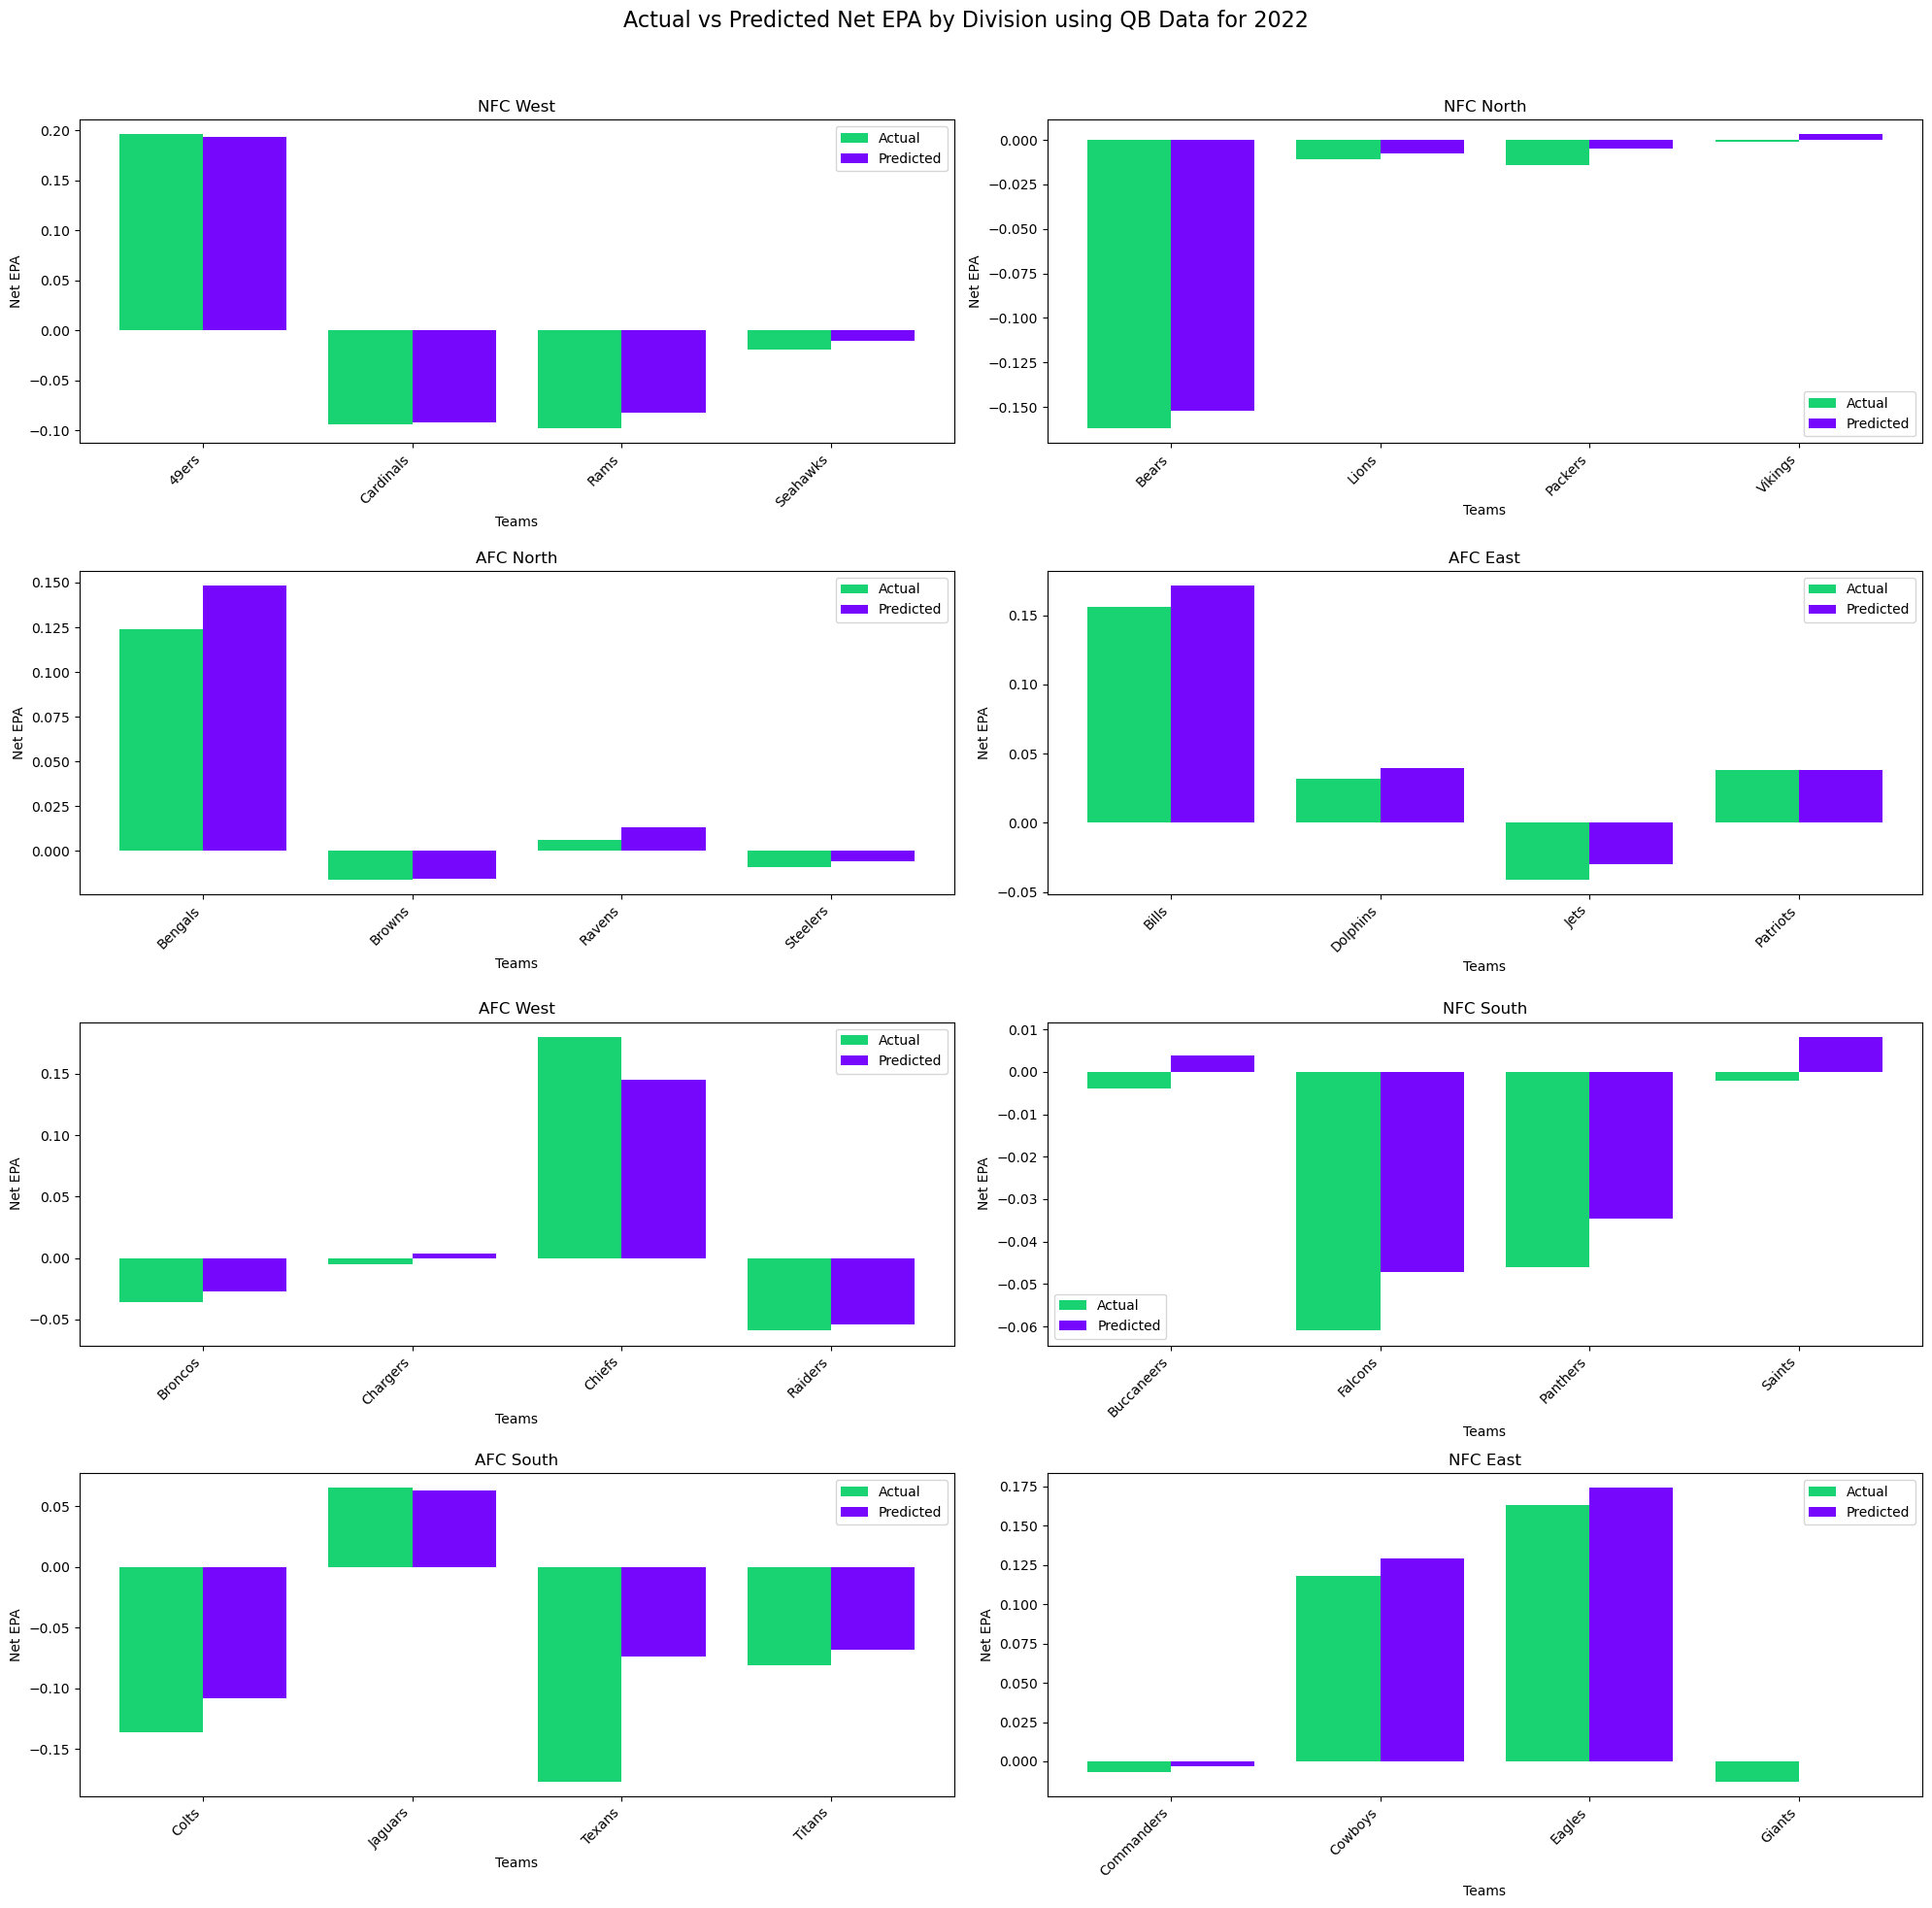

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016     
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8192e-04 
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016     
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8854e-04 
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2143e-04 
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7997e-04 
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0133e-04 
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0192e-04 
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6792e-04 
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5480e-04 
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016     
Epoch 13/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021     
Epoch 14/150


/opt/anaconda3/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011     
Epoch 15/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 
Epoch 16/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4392e-04 
Epoch 17/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020     
Epoch 18/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1121e-04
Epoch 19/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5586e-04 
Epoch 20/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 9.2062e-04
Epoch 21/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4126e-04 
Epoch 22/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0267e-04 
Epoch 23/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1817e-04
Epoch 24/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8982e-04 
Epoch 25/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 6.1044e-04
Epoch 26/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 5.3417e-04
Epoch 27/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 4.5526e-04
Epoch 28/150
4/4 ━━━━━━━━━━━━━━━━━━

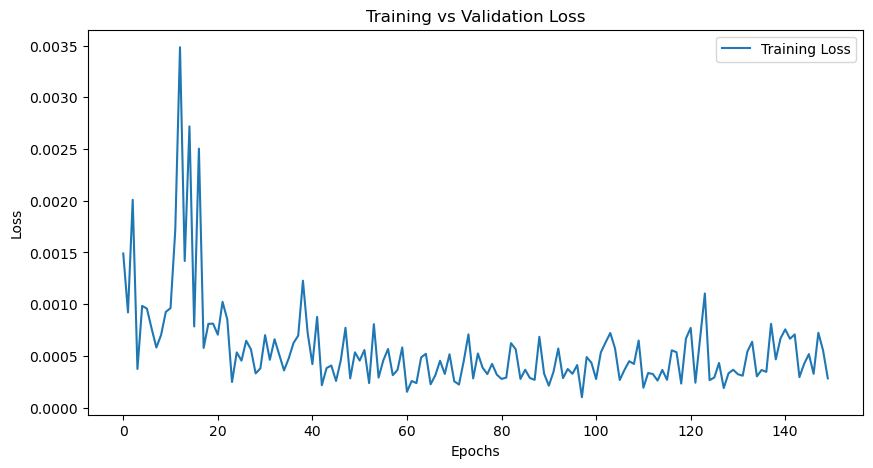

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
32
R² Score: 0.9902


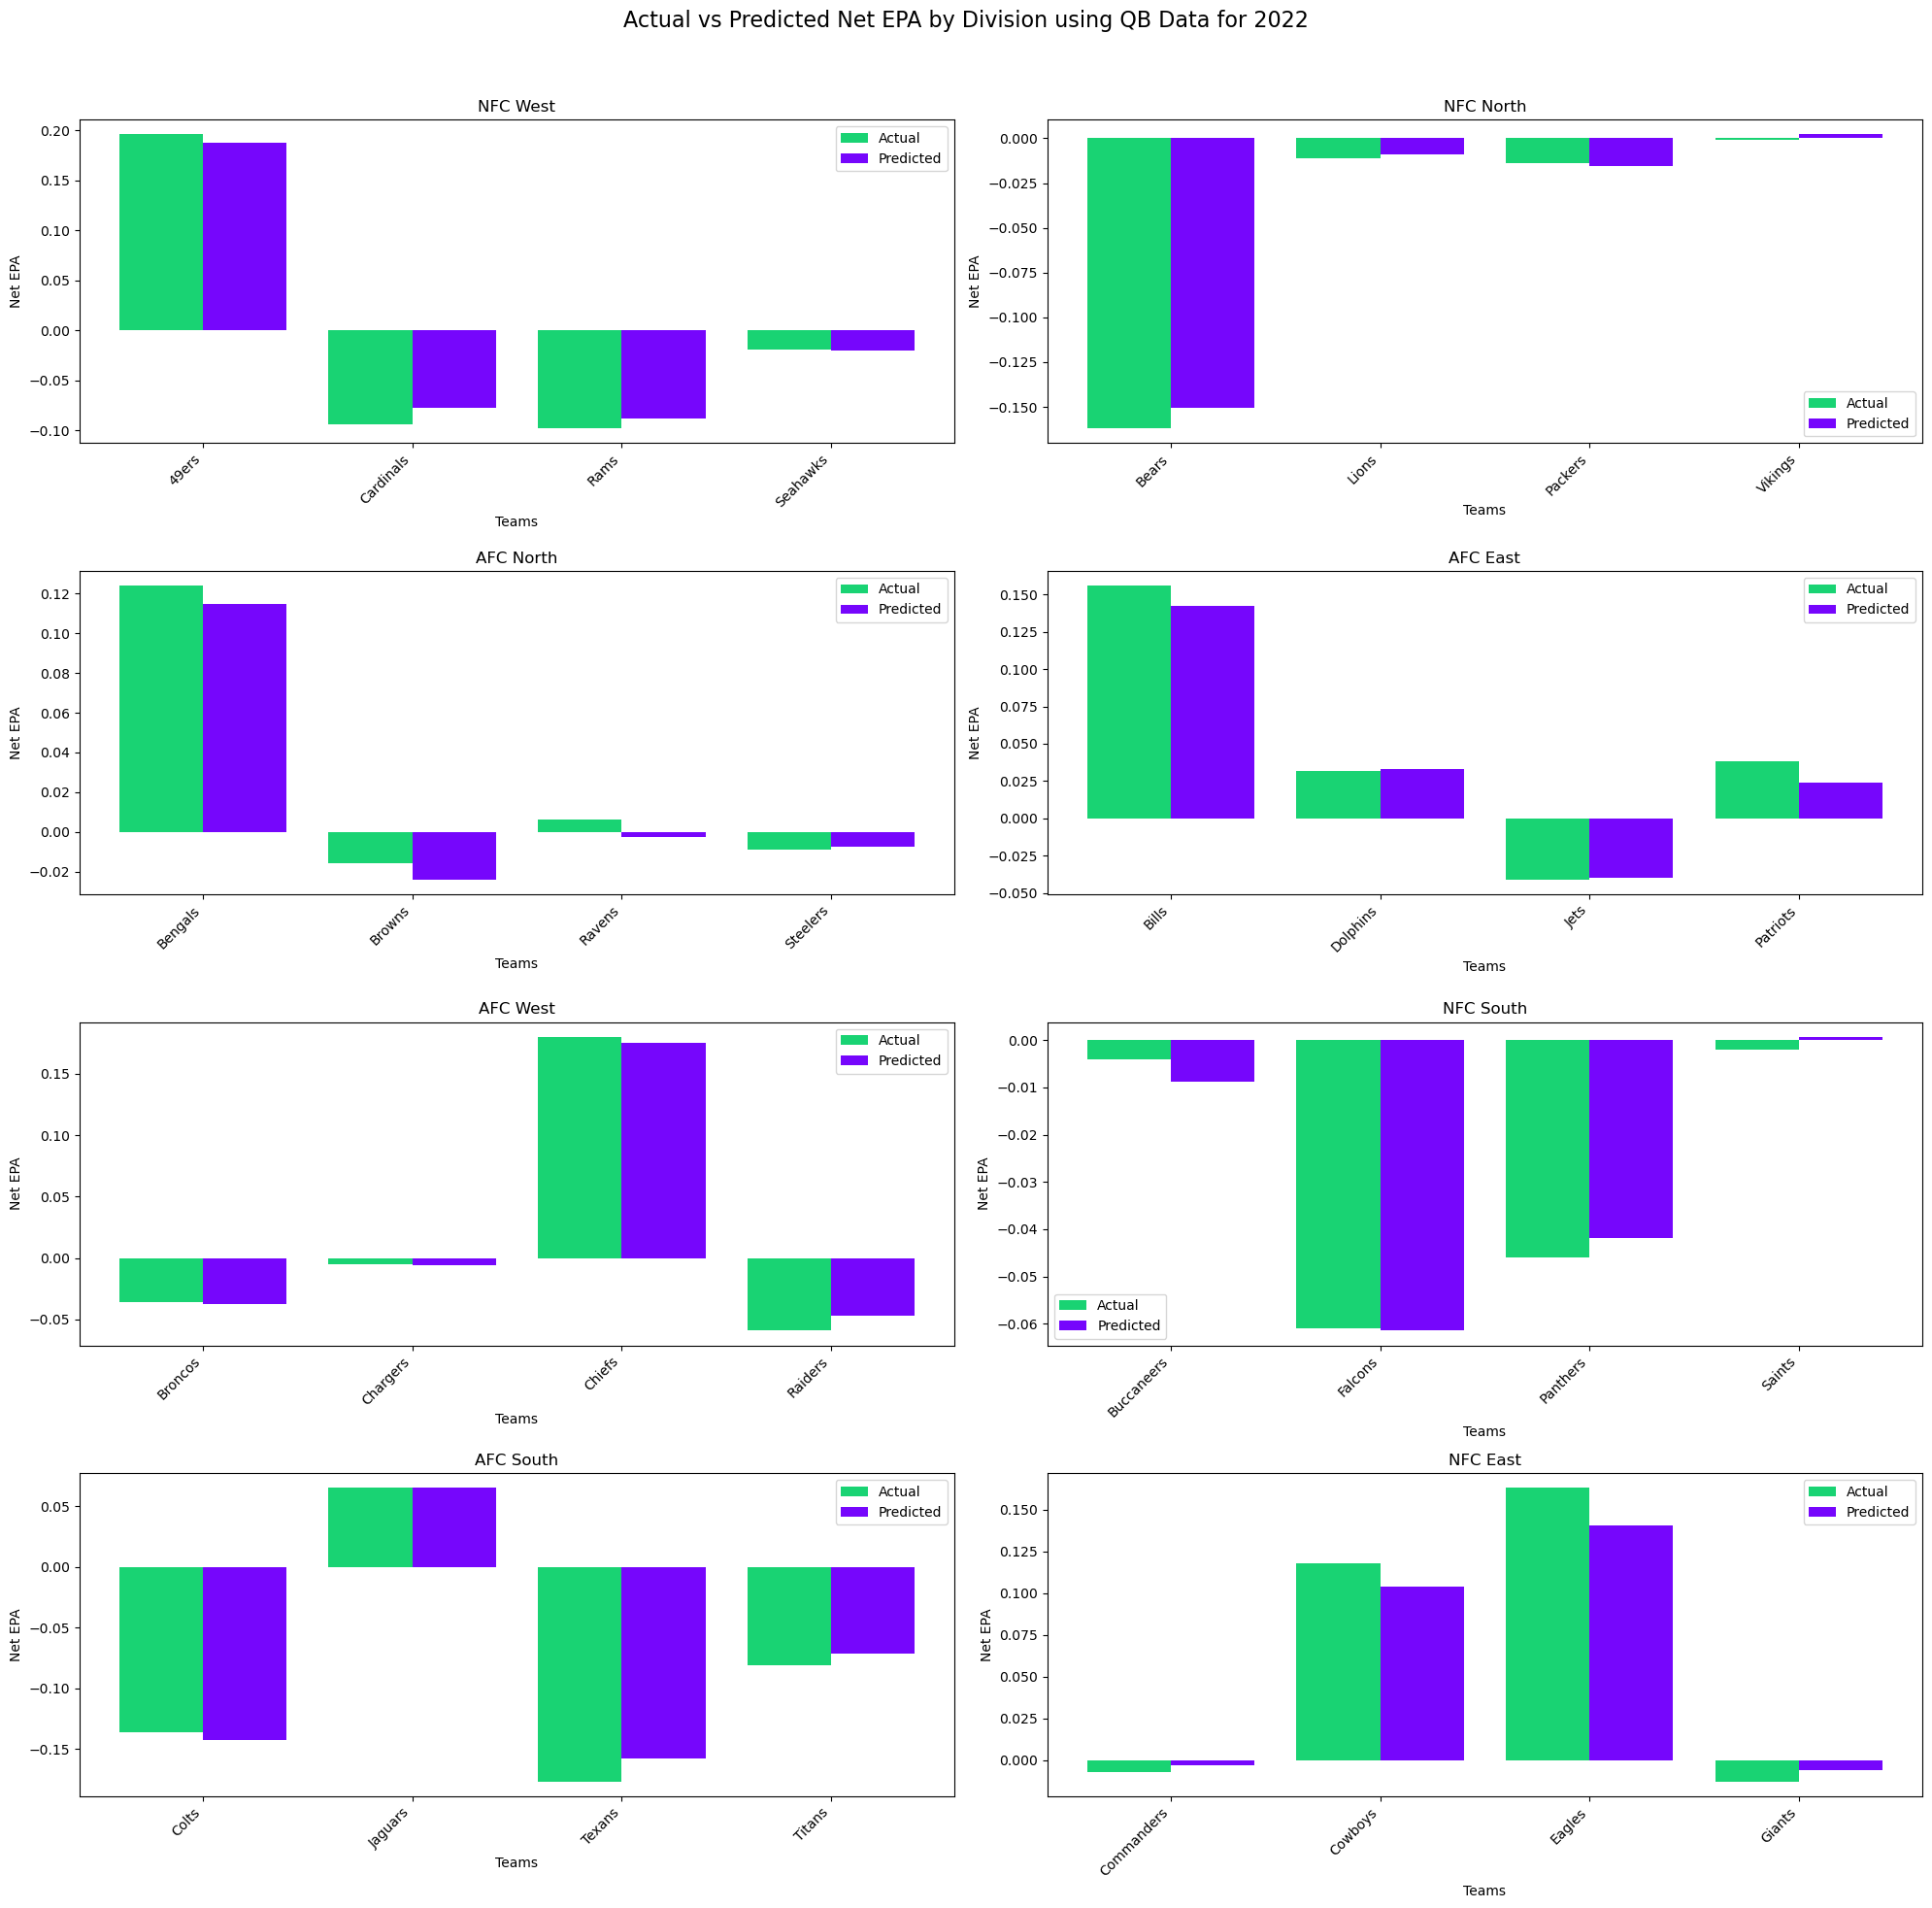

In [74]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 25, 50, 100, 150]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, callbacks=[early_stopping])
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    print(len(y_pred))
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    data = df[df['Year'] == 2022].copy()
    data['Predicted_Net_EPA'] = y_pred
    data['Model Actual Net EPA'] = y
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Net EPA', 'Predicted_Net_EPA', 'Team', 'Model Actual Net EPA', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Net EPA by Division using QB Data for 2022', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Net EPA'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_Net_EPA'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Net EPA')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()
        